# Objectives
YWBAT
* run gridsearchcv on a sklearn model 
* properly do a train/test/validation split
* determine which metric is best in various scenarios and how to interpret metrics using a confusion matrix
* interpret the mathematical equations of each metric
    * accuracy
    * recall 
    * f1
    * precision

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, fbeta_score, f1_score, precision_score, make_scorer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PowerTransformer
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly
import plotly.graph_objects as go

In [2]:
# Load in data for classification

df = pd.read_csv("../data/bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

# let's get some of this data in a format to model


In [4]:
df_train, df_test = train_test_split(df, test_size=0.10)
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4352,25,blue-collar,married,secondary,no,316,yes,yes,unknown,19,may,360,2,-1,0,unknown,no
3031,32,blue-collar,single,secondary,no,116,no,no,unknown,14,may,392,1,-1,0,unknown,no
27069,36,blue-collar,married,secondary,no,2452,yes,no,cellular,21,nov,161,1,-1,0,unknown,no
23374,54,self-employed,married,unknown,no,204,no,no,cellular,27,aug,231,5,-1,0,unknown,no
18269,43,admin.,married,secondary,no,1996,no,yes,cellular,31,jul,34,3,-1,0,unknown,no


In [31]:
def map_housing(df):
    df['housing_values'] = df['housing'].apply(lambda x: 1 if x.lower()=='yes' else 0)
    return df

def map_default(df):
    df['default_values'] = df['default'].apply(lambda x: 1 if x.lower()=='yes' else 0)
    return df


def map_loan(df):
    df['loan_values'] = df['loan'].apply(lambda x: 1 if x.lower()=='yes' else 0)
    return df

def transform_dataframe(df):
    df = map_housing(df)
    df = map_default(df)
    df = map_loan(df)
    return df

def plot_confusion(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='0.4g', cmap=sns.color_palette('rocket'))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    pass



def evaluate_test_data(logreg, df_test, feature_for_modeling, target='y'):
    df_test = transform_dataframe(df_test)
    X = df_test[feature_for_modeling]
    y = df_test[target]
    score = logreg.score(X, y)
    print(f"Score of model = {score}")
    y_pred = logreg.predict(X)
    plot_confusion(y, y_pred)
    pass

In [6]:
df_train = transform_dataframe(df_train)
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,housing_values,default_values,loan_values
28062,40,blue-collar,single,primary,no,366,yes,yes,cellular,28,jan,168,2,205,1,failure,no,1,0,1
22258,49,technician,divorced,secondary,no,57,no,no,cellular,21,aug,396,3,-1,0,unknown,no,0,0,0
32270,56,blue-collar,single,secondary,no,6483,yes,no,cellular,16,apr,125,2,-1,0,unknown,no,1,0,0
3879,51,blue-collar,married,primary,no,1194,yes,no,unknown,16,may,558,3,-1,0,unknown,no,1,0,0
42838,31,admin.,single,secondary,no,523,no,yes,cellular,2,feb,323,1,109,5,failure,no,0,0,1


In [7]:
features_for_modeling = ['housing_values', 'default_values', 'loan_values', 'age', 'balance']

In [8]:
X = df_train[features_for_modeling]
y = df_train['y']
X.shape, y.shape

((40689, 5), (40689,))

In [42]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.50)

In [43]:
logreg = LogisticRegression()

In [44]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.8850766810853323, 0.8816416810027033)

In [46]:
df_train['y'].value_counts(normalize=True)

no     0.883457
yes    0.116543
Name: y, dtype: float64

In [47]:
y_test_pred = logreg.predict(X_test)

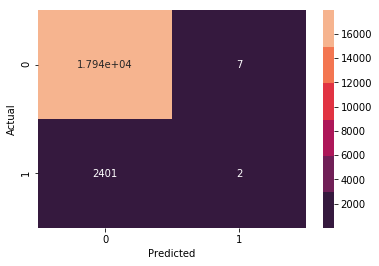

In [48]:
plot_confusion(y_test, y_test_pred)

Score of model = 0.8783724015922159


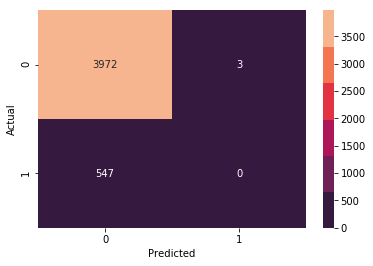

In [49]:
evaluate_test_data(logreg=logreg, df_test=df_test, feature_for_modeling=features_for_modeling)

# What have we learned so far?
* best practices is to train/test split at the onset (validation set)
* plan for a pipeline
* MLE is a very stats driven tool
* OneHotEncoder is better than pd.get_dummies()
    * OneHotEncoder maintains transformation
    * keeps mapping consistent
* How and why/when to use MLE

# What do we want to see in the next 30 minutes?
* roc curves and auc
* fixing the imbalance
* going over confusion matrix

# class imbalance

In [50]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [51]:
smote = SMOTE()

In [52]:
smote.fit(X_train, y_train)

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=None, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')

In [53]:
# you only need to transform your train data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [54]:
y_train.shape, y_train_smote.shape

((20344,), (36010,))

In [55]:
y_train_smote_series = pd.Series(y_train_smote)
y_train_smote_series.value_counts()

yes    18005
no     18005
dtype: int64

In [56]:
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.6164962642548172, 0.6138117473580732)

Score of model = 0.605484298982751


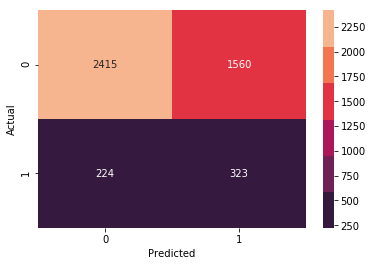

In [58]:
evaluate_test_data(logreg, df_test = df_test, feature_for_modeling=features_for_modeling)

In [35]:
# everything that isn't a model
# must have a .fit(), .fit_transform() and a .transfor()
pipeline = Pipeline(steps=[
    ('minmax', MinMaxScaler()),
    ('logreg', LogisticRegression())
])

In [38]:
pipeline.fit(X_train_smote, y_train_smote)

Pipeline(memory=None,
         steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [39]:
pipeline.score(X_test, y_test)

0.6459818137134431

In [59]:
df_test_transformed = transform_dataframe(df_test)
pipeline.score(df_test_transformed[features_for_modeling], df_test['y'])

0.6377708978328174

# Custom PrePrecessor [Blog Here](https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65)

In [ ]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ] 

In [ ]:
class MyLogisticRegression(LogisticRegression):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    
    def score(X, y):
        